In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from collections import Counter
import collections
import seaborn as sns

In [2]:
df=pd.read_excel('Yelp_Update_Cleaned_5_20.xlsx')

In [3]:
df['day_split']=''

In [4]:
df['time_split']=''

In [5]:
outer_count = 0

while outer_count < len(df): 
    temp_date = df.iloc[outer_count].date
    
    day = ''
    i=0

    while i <len(temp_date):
        day+=temp_date[i:i+10]
        day+=','

        i+=21
    day = day.rstrip(day[-1])
    df.loc[outer_count,'day_split']=day
    
    
    time = ''
    z=11

    while z <len(temp_date):
        time+=temp_date[z:z+8]
        time+=','

        z+=21
    time = time.rstrip(time[-1])
    df.loc[outer_count,'time_split']=time
    
    outer_count+=1

In [6]:
#pd.set_option('display.max_colwidth', None)
df[df['name']=="Nervous Charlie's"].time_split

553    00:07:21,12:15:54,14:00:33,14:26:46,14:41:05,1...
Name: time_split, dtype: object

In [7]:
df[df['name']=="Nervous Charlie's"].business_id

553    6cIzTqQGthBctMWzxLHwRQ
Name: business_id, dtype: object

In [8]:
df.iloc[4].date

'2018-07-03 17:29:39, 2018-07-04 05:52:00, 2018-07-06 17:50:33, 2018-07-12 18:17:16, 2018-07-15 18:18:10, 2018-07-19 18:41:20, 2018-07-23 02:58:43, 2018-07-23 02:59:23, 2018-07-27 00:45:34, 2018-07-28 18:38:41, 2018-07-30 23:30:26, 2018-08-11 00:16:34, 2018-08-11 18:18:55, 2018-08-14 17:55:10, 2018-08-15 02:24:34, 2018-08-25 18:10:11, 2018-08-25 22:57:47, 2018-08-26 02:41:29, 2018-08-30 01:58:52, 2018-08-31 19:29:56, 2018-08-31 19:30:30, 2018-09-03 16:12:35, 2018-09-08 16:50:32, 2018-09-12 19:31:14, 2018-09-18 01:22:26, 2018-09-22 16:39:45, 2018-09-29 01:17:45, 2018-10-06 16:49:08, 2018-10-19 18:24:40, 2018-10-21 18:17:08, 2018-11-03 01:45:37, 2018-11-03 16:26:48, 2018-11-08 01:25:39, 2018-11-08 02:29:09, 2018-11-11 19:44:45, 2018-11-16 02:44:51, 2018-11-21 01:32:05, 2018-11-24 18:00:46, 2018-12-01 17:58:38, 2018-12-03 01:00:26, 2018-12-03 19:18:28, 2018-12-05 02:59:30, 2018-12-07 19:22:52, 2018-12-07 22:03:26, 2018-12-08 17:13:27, 2018-12-16 17:34:37, 2018-12-27 17:05:37, 2018-12-28 0

In [9]:
df.head(5)

,Unnamed: 0,business_id,name,address,postal_code,stars,review_count,is_open,attributes,categories,hours,date,day_split,time_split
0,1,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",78735,4.5,395,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...","2017-03-21 16:45:08, 2017-03-22 00:46:01, 2017...","2017-03-21,2017-03-22,2017-03-24,2017-03-31,20...","16:45:08,00:46:01,00:39:38,22:49:33,19:19:20,2..."
1,5,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,9500 S IH-35 Service Rd,78748,3.0,136,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Italian, Salad, Pizza, Nightlife, Restaurants,...","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...","2010-02-01 00:30:57, 2010-03-06 01:11:29, 2010...","2010-02-01,2010-03-06,2010-03-20,2010-03-26,20...","00:30:57,01:11:29,18:38:44,16:42:13,16:33:40,0..."
2,7,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,78701,3.5,119,1,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...","Tex-Mex, Mexican, Tacos, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","2019-02-24 00:01:29, 2019-03-06 18:14:49, 2019...","2019-02-24,2019-03-06,2019-03-09,2019-03-11,20...","00:01:29,18:14:49,20:06:49,01:21:45,00:27:12,1..."
3,8,fBvQQUk1-V9IUA8PbuYFWg,Newk's Eatery,408 Congress Ave,78701,3.5,43,1,"{'HasTV': 'True', 'BusinessParking': ""{'garage...","Pizza, Restaurants, American (Traditional), Am...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-18:0',...","2018-03-17 23:44:58, 2018-03-20 16:46:51, 2018...","2018-03-17,2018-03-20,2018-03-23,2018-03-25,20...","23:44:58,16:46:51,18:51:05,19:08:42,00:22:49,1..."
4,9,LjQ_z_eYTvbPkdnxD_Ucrw,Zaika Indian Contemporary Cuisine,9025 Research Blvd,78758,4.0,149,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Restaurants, Indian","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...","2018-07-03 17:29:39, 2018-07-04 05:52:00, 2018...","2018-07-03,2018-07-04,2018-07-06,2018-07-12,20...","17:29:39,05:52:00,17:50:33,18:17:16,18:18:10,1..."


In [10]:
df.iloc[4].date

'2018-07-03 17:29:39, 2018-07-04 05:52:00, 2018-07-06 17:50:33, 2018-07-12 18:17:16, 2018-07-15 18:18:10, 2018-07-19 18:41:20, 2018-07-23 02:58:43, 2018-07-23 02:59:23, 2018-07-27 00:45:34, 2018-07-28 18:38:41, 2018-07-30 23:30:26, 2018-08-11 00:16:34, 2018-08-11 18:18:55, 2018-08-14 17:55:10, 2018-08-15 02:24:34, 2018-08-25 18:10:11, 2018-08-25 22:57:47, 2018-08-26 02:41:29, 2018-08-30 01:58:52, 2018-08-31 19:29:56, 2018-08-31 19:30:30, 2018-09-03 16:12:35, 2018-09-08 16:50:32, 2018-09-12 19:31:14, 2018-09-18 01:22:26, 2018-09-22 16:39:45, 2018-09-29 01:17:45, 2018-10-06 16:49:08, 2018-10-19 18:24:40, 2018-10-21 18:17:08, 2018-11-03 01:45:37, 2018-11-03 16:26:48, 2018-11-08 01:25:39, 2018-11-08 02:29:09, 2018-11-11 19:44:45, 2018-11-16 02:44:51, 2018-11-21 01:32:05, 2018-11-24 18:00:46, 2018-12-01 17:58:38, 2018-12-03 01:00:26, 2018-12-03 19:18:28, 2018-12-05 02:59:30, 2018-12-07 19:22:52, 2018-12-07 22:03:26, 2018-12-08 17:13:27, 2018-12-16 17:34:37, 2018-12-27 17:05:37, 2018-12-28 0

In [11]:
df.iloc[4].day_split

'2018-07-03,2018-07-04,2018-07-06,2018-07-12,2018-07-15,2018-07-19,2018-07-23,2018-07-23,2018-07-27,2018-07-28,2018-07-30,2018-08-11,2018-08-11,2018-08-14,2018-08-15,2018-08-25,2018-08-25,2018-08-26,2018-08-30,2018-08-31,2018-08-31,2018-09-03,2018-09-08,2018-09-12,2018-09-18,2018-09-22,2018-09-29,2018-10-06,2018-10-19,2018-10-21,2018-11-03,2018-11-03,2018-11-08,2018-11-08,2018-11-11,2018-11-16,2018-11-21,2018-11-24,2018-12-01,2018-12-03,2018-12-03,2018-12-05,2018-12-07,2018-12-07,2018-12-08,2018-12-16,2018-12-27,2018-12-28,2018-12-28,2018-12-28,2018-12-30,2019-01-04,2019-01-11,2019-01-12,2019-01-14,2019-01-22,2019-02-17,2019-03-10,2019-03-14,2019-03-16,2019-04-01,2019-04-02,2019-04-27,2019-05-23,2019-06-08,2019-06-09,2019-07-14,2019-07-18,2019-07-29,2019-08-04,2019-08-29,2019-09-13,2019-09-28,2019-09-28,2019-11-27,2020-01-12,2020-02-07,2020-02-22,2020-02-28,2020-05-03,2020-06-06,2020-06-28,2020-09-26,2020-10-15,2020-10-18,2020-12-20'

In [12]:
df.iloc[4].time_split

'17:29:39,05:52:00,17:50:33,18:17:16,18:18:10,18:41:20,02:58:43,02:59:23,00:45:34,18:38:41,23:30:26,00:16:34,18:18:55,17:55:10,02:24:34,18:10:11,22:57:47,02:41:29,01:58:52,19:29:56,19:30:30,16:12:35,16:50:32,19:31:14,01:22:26,16:39:45,01:17:45,16:49:08,18:24:40,18:17:08,01:45:37,16:26:48,01:25:39,02:29:09,19:44:45,02:44:51,01:32:05,18:00:46,17:58:38,01:00:26,19:18:28,02:59:30,19:22:52,22:03:26,17:13:27,17:34:37,17:05:37,01:34:03,01:35:42,18:35:33,02:18:14,02:09:01,18:57:45,20:31:13,01:54:30,00:31:13,23:38:24,03:11:32,01:09:04,17:52:20,23:16:23,00:01:44,00:10:25,02:08:54,17:45:50,18:52:50,18:36:43,14:39:12,00:53:02,19:11:44,17:30:05,00:06:31,16:14:22,19:12:16,19:26:25,01:55:21,17:34:42,18:18:06,18:13:13,12:52:28,18:54:13,17:34:41,22:56:05,02:20:54,23:57:45,17:51:03'

In [13]:
time_list = df.iloc[4].time_split.split(',')

In [14]:
time_list

['17:29:39',
 '05:52:00',
 '17:50:33',
 '18:17:16',
 '18:18:10',
 '18:41:20',
 '02:58:43',
 '02:59:23',
 '00:45:34',
 '18:38:41',
 '23:30:26',
 '00:16:34',
 '18:18:55',
 '17:55:10',
 '02:24:34',
 '18:10:11',
 '22:57:47',
 '02:41:29',
 '01:58:52',
 '19:29:56',
 '19:30:30',
 '16:12:35',
 '16:50:32',
 '19:31:14',
 '01:22:26',
 '16:39:45',
 '01:17:45',
 '16:49:08',
 '18:24:40',
 '18:17:08',
 '01:45:37',
 '16:26:48',
 '01:25:39',
 '02:29:09',
 '19:44:45',
 '02:44:51',
 '01:32:05',
 '18:00:46',
 '17:58:38',
 '01:00:26',
 '19:18:28',
 '02:59:30',
 '19:22:52',
 '22:03:26',
 '17:13:27',
 '17:34:37',
 '17:05:37',
 '01:34:03',
 '01:35:42',
 '18:35:33',
 '02:18:14',
 '02:09:01',
 '18:57:45',
 '20:31:13',
 '01:54:30',
 '00:31:13',
 '23:38:24',
 '03:11:32',
 '01:09:04',
 '17:52:20',
 '23:16:23',
 '00:01:44',
 '00:10:25',
 '02:08:54',
 '17:45:50',
 '18:52:50',
 '18:36:43',
 '14:39:12',
 '00:53:02',
 '19:11:44',
 '17:30:05',
 '00:06:31',
 '16:14:22',
 '19:12:16',
 '19:26:25',
 '01:55:21',
 '17:34:42',

In [15]:
len(time_list)

86

In [16]:
time_list[1][0:2]== 5

False

In [17]:
int(time_list[1][0:2])== 5

True

In [18]:
hours = []
for i in time_list: 
    hours.append(int(i[0:2]))
hours

[17,
 5,
 17,
 18,
 18,
 18,
 2,
 2,
 0,
 18,
 23,
 0,
 18,
 17,
 2,
 18,
 22,
 2,
 1,
 19,
 19,
 16,
 16,
 19,
 1,
 16,
 1,
 16,
 18,
 18,
 1,
 16,
 1,
 2,
 19,
 2,
 1,
 18,
 17,
 1,
 19,
 2,
 19,
 22,
 17,
 17,
 17,
 1,
 1,
 18,
 2,
 2,
 18,
 20,
 1,
 0,
 23,
 3,
 1,
 17,
 23,
 0,
 0,
 2,
 17,
 18,
 18,
 14,
 0,
 19,
 17,
 0,
 16,
 19,
 19,
 1,
 17,
 18,
 18,
 12,
 18,
 17,
 22,
 2,
 23,
 17]

In [19]:
freq = {}
for item in hours:
    if (item in freq):
        freq[item] += 1
    else:
        freq[item] = 1
sorted(freq)

[0, 1, 2, 3, 5, 12, 14, 16, 17, 18, 19, 20, 22, 23]

In [20]:
od = collections.OrderedDict(sorted(freq.items()))

In [21]:
od

OrderedDict([(0, 7),
             (1, 12),
             (2, 11),
             (3, 1),
             (5, 1),
             (12, 1),
             (14, 1),
             (16, 6),
             (17, 13),
             (18, 16),
             (19, 9),
             (20, 1),
             (22, 3),
             (23, 4)])

In [22]:
single = df[df['postal_code']==78751]

In [23]:
single = single[single['categories'].str.contains('Breakfast & Brunch|Bagels')]

In [24]:
single

,Unnamed: 0,business_id,name,address,postal_code,stars,review_count,is_open,attributes,categories,hours,date,day_split,time_split
39,69,EwUahd4SYKdPH1p1Cpe5fg,Hyde Park Bar & Grill Central,4206 Duval St,78751,3.5,627,1,"{'RestaurantsAttire': ""'casual'"", 'BusinessPar...","Bars, Burgers, Food, American (New), Breakfast...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","2010-01-23 02:28:09, 2010-01-24 03:35:02, 2010...","2010-01-23,2010-01-24,2010-01-31,2010-02-26,20...","02:28:09,03:35:02,18:52:00,05:53:49,02:05:19,0..."
391,772,FpyyZkQ2zr7zUvhjDwSTcQ,Biscuits and Groovy,5015 Duval St,78751,4.0,625,1,"{'BusinessParking': ""{'garage': False, 'street...","Breakfast & Brunch, Vegan, Restaurants, Food S...","{'Monday': '9:0-14:0', 'Tuesday': '9:0-14:0', ...","2010-10-02 16:19:29, 2010-10-09 14:03:11, 2010...","2010-10-02,2010-10-09,2010-10-10,2010-10-26,20...","16:19:29,14:03:11,16:58:04,03:58:34,16:05:00,1..."
515,1012,Xuyfcldi878hjqQPAOtlCA,Quack's 43rd Street Bakery,411 E 43rd St,78751,4.0,724,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Bakeries, Restaurants, Bagels, Coffee & Tea, Food","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '...","2010-02-09 16:42:05, 2010-02-09 23:01:26, 2010...","2010-02-09,2010-02-09,2010-02-12,2010-02-13,20...","16:42:05,23:01:26,23:01:51,02:55:20,21:10:26,0..."
553,1098,6cIzTqQGthBctMWzxLHwRQ,Nervous Charlie's,"5501 N Lamar Blvd, Ste B101",78751,4.5,332,1,"{'GoodForKids': 'True', 'GoodForMeal': ""{'dess...","Restaurants, Sandwiches, Bagels, Breakfast & B...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ...","2018-09-20 00:07:21, 2018-09-21 12:15:54, 2018...","2018-09-20,2018-09-21,2018-09-22,2018-09-23,20...","00:07:21,12:15:54,14:00:33,14:26:46,14:41:05,1..."
1209,2448,FWppPI6i6GJ1EXtT7U3G4Q,Vaquero Taquero,104 E 31st,78751,4.5,160,1,"{'RestaurantsTableService': 'False', 'Restaura...","Tacos, Mexican, Restaurants, Breakfast & Brunc...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...","2017-03-10 01:21:18, 2017-03-16 18:52:49, 2017...","2017-03-10,2017-03-16,2017-04-22,2017-05-05,20...","01:21:18,18:52:49,04:29:10,23:46:23,23:23:33,2..."
1264,2532,jUiS3w1HX6qhEzNduA3oVw,Tyson's Tacos,4905 Airport Blvd,78751,4.0,798,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Food, Coffee & Tea, Restaurants, Breakfast & B...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","2013-03-12 16:58:04, 2013-03-16 18:51:47, 2013...","2013-03-12,2013-03-16,2013-03-16,2013-03-20,20...","16:58:04,18:51:47,18:52:01,14:06:34,14:09:34,1..."
1412,2850,fTwvEZw8tvF73QxcX-5TdA,Mongers Market + Kitchen,4119 Guadalupe St,78751,4.0,353,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Seafood, Specialty Food, Food, Restaurants, Br...","{'Tuesday': '12:0-21:30', 'Wednesday': '12:0-2...","2015-03-13 20:11:41, 2015-03-18 00:50:42, 2015...","2015-03-13,2015-03-18,2015-03-21,2015-03-26,20...","20:11:41,00:50:42,18:13:47,00:56:46,22:14:17,2..."
1464,2950,yrHMqDwZf9iu3xLS11DK5A,The Omelettry,4631 Airport Blvd,78751,3.5,362,1,"{'NoiseLevel': ""'average'"", 'RestaurantsReserv...","Diners, Restaurants, Breakfast & Brunch, Ameri...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...","2015-05-23 18:34:02, 2015-05-24 18:54:01, 2015...","2015-05-23,2015-05-24,2015-05-26,2015-05-26,20...","18:34:02,18:54:01,15:57:20,16:41:41,17:53:09,2..."
1673,3374,JW1gWHsnL1ClKpBOzGEu-w,Sala and Betty,5201 Airport Blvd,78751,4.5,518,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Sandwiches, Food, Breakfast & Brunch, American...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...","2015-02-18 15:33:39, 2015-02-19 00:10:32, 2015...","2015-02-18,2015-02-19,2015-02-19,2015-02-19,20...","15:33:39,00:10:32,00:23:17,18:00:42,23:26:44,0..."
1750,3523,ZvYDNfxeJgnB0_9jwSAsxQ,Mandola's Italian,"4700 W Guadalupe St, Ste 12",78751,4.0,958,1,"{'WiFi': ""u'free'"", 'BYOBCorkage': ""'no'"", 'Al...","Grocery, Food, Nightlife, Italian, Pizza, Ethn...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...","2010-01-30 18:08:38, 2010-02-0

In [25]:
freq = {}
i=0

while i< len(single): 
    time_list = single.iloc[i].time_split.split(',')
    hours = []
    for t in time_list: 
        hours.append(int(t[0:2]))
    
    
    for item in hours:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
            
    i+=1
#https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

In [26]:
saved = sorted(freq.items())
#https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key

In [27]:
saved

[(0, 1145),
 (1, 1115),
 (2, 812),
 (3, 409),
 (4, 182),
 (5, 86),
 (6, 41),
 (7, 53),
 (8, 38),
 (9, 16),
 (10, 10),
 (11, 28),
 (12, 179),
 (13, 270),
 (14, 532),
 (15, 683),
 (16, 883),
 (17, 1038),
 (18, 943),
 (19, 666),
 (20, 455),
 (21, 374),
 (22, 482),
 (23, 835)]

Text(0.5,0,'Time of Day (24hours)')

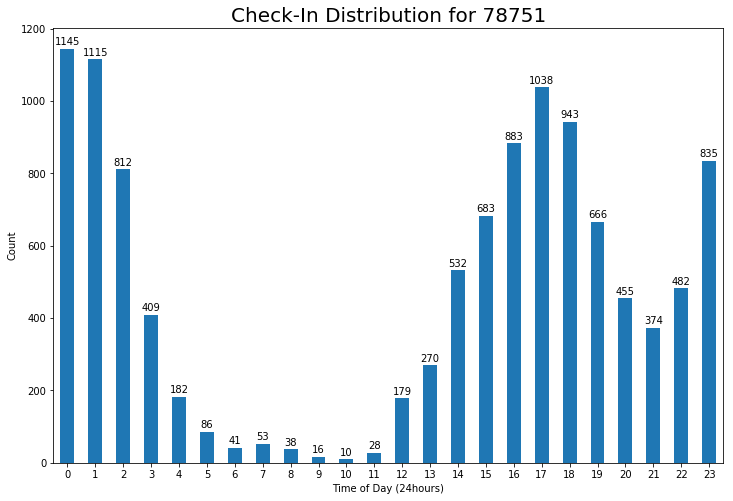

In [28]:
plt.figure(figsize=(12,8))

x_labels = [val[0] for val in saved]
y_labels = [val[1] for val in saved]
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels,rotation=0)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.title('Check-In Distribution for 78751',fontsize=20)
plt.ylabel('Count')
plt.xlabel('Time of Day (24hours)')

In [29]:
southzips = [78704, 78749, 78745, 78748, 78741,78744]
northzips = [78730,78731,78732,78734,78613,78727,78758,78753,78751,78757,78701,78703,78705,78756,78759,78750,78728]
eastzips = [78702,78721,78723,78742,78722,78752,78719]
westzips = [78746,78733,78735]
popzips = [78746,78722,78723,78613,78701,78705,78759]

total_zips = [southzips,northzips,eastzips,westzips,popzips]

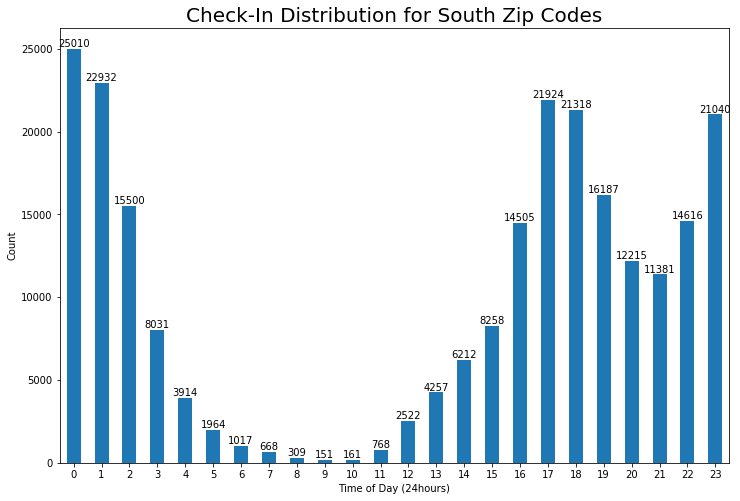

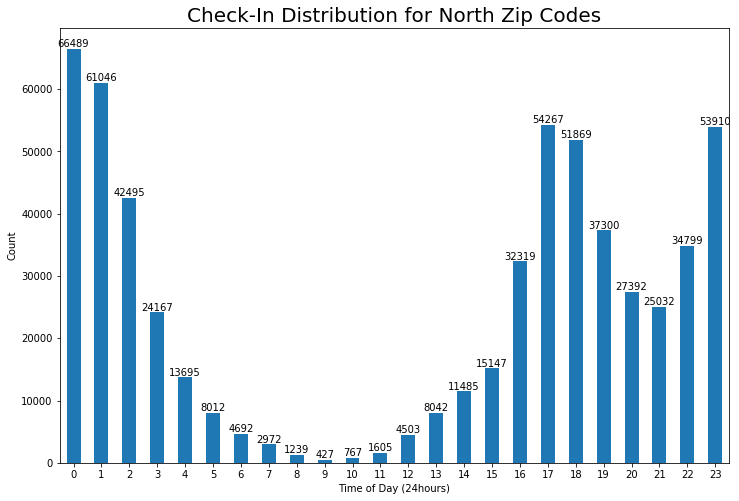

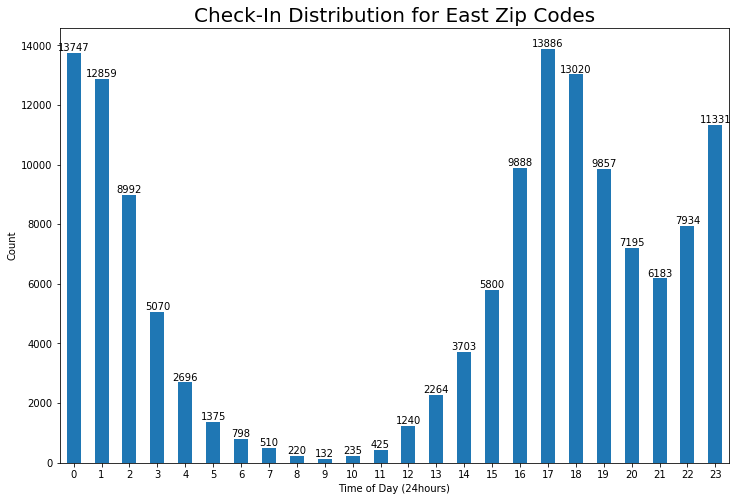

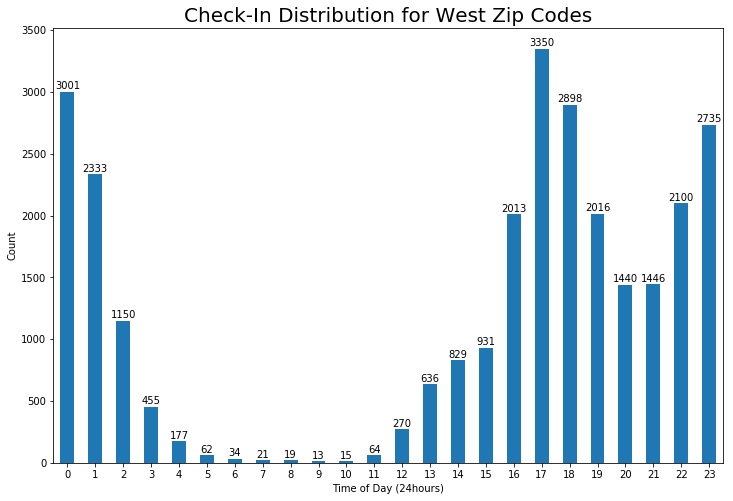

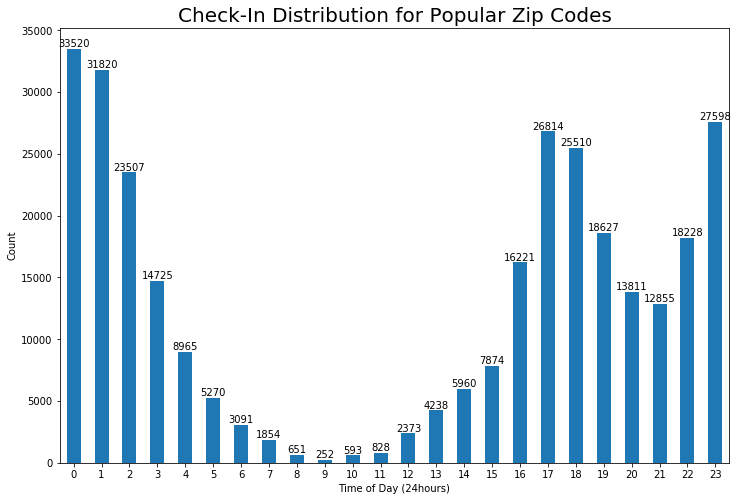

In [30]:
names = ['South','North','East','West','Popular']

for z in total_zips:

    temp_df = df[df['postal_code'].isin(z)]
    
    freq = {}
    i=0

    while i< len(temp_df): 
        time_list = temp_df.iloc[i].time_split.split(',')
        hours = []
        for t in time_list: 
            hours.append(int(t[0:2]))


        for item in hours:
            if (item in freq):
                freq[item] += 1
            else:
                freq[item] = 1

        i+=1
    saved = sorted(freq.items())
    plt.figure(figsize=(12,8))

    x_labels = [val[0] for val in saved]
    y_labels = [val[1] for val in saved]
    ax = pd.Series(y_labels).plot(kind='bar')
    ax.set_xticklabels(x_labels,rotation=0)

    rects = ax.patches

    for rect, label in zip(rects, y_labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

    plt.title(f'Check-In Distribution for {names[total_zips.index(z)]} Zip Codes',fontsize=20)
    plt.ylabel('Count')
    plt.xlabel('Time of Day (24hours)')

In [46]:
df[df['postal_code'].isin([78704, 78749, 78745, 78748, 78741,78744])]

,Unnamed: 0,business_id,name,address,postal_code,stars,review_count,is_open,attributes,categories,hours,date,day_split,time_split
1,5,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,9500 S IH-35 Service Rd,78748,3.0,136,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Italian, Salad, Pizza, Nightlife, Restaurants,...","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...","2010-02-01 00:30:57, 2010-03-06 01:11:29, 2010...","2010-02-01,2010-03-06,2010-03-20,2010-03-26,20...","00:30:57,01:11:29,18:38:44,16:42:13,16:33:40,0..."
5,10,UbP_JuB-zHHfLz2dvKe9yw,Taqueria Peloncitos,5303 Nuckols Crossing Rd,78744,4.0,12,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...","Restaurants, Food, Food Trucks, Mexican","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...","2016-08-23 22:02:43, 2017-04-08 17:14:43, 2017...","2016-08-23,2017-04-08,2017-05-21,2017-10-06,20...","22:02:43,17:14:43,16:32:08,19:12:18,16:36:59,1..."
9,18,T55nNWr06T492oDUh0R8bQ,Cilantro's,1025 W Stassney Ln,78745,3.5,37,1,"{'BikeParking': 'False', 'RestaurantsReservati...","Restaurants, Mexican",NaN,"2010-11-15 22:20:10, 2011-05-13 23:52:20, 2011...","2010-11-15,2011-05-13,2011-05-20,2011-05-20,20...","22:20:10,23:52:20,11:06:05,23:50:54,17:19:50,1..."
19,35,DSEsFWzM3UCq54E2X0P9Zg,Mangieri's Pizza Cafe,5900 W Slaughter Ln,78749,4.0,237,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'f...","Restaurants, Pizza, Italian","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","2010-01-20 01:04:03, 2010-02-14 02:59:06, 2010...","2010-01-20,2010-02-14,2010-06-12,2010-06-12,20...","01:04:03,02:59:06,00:10:33,18:50:43,23:48:36,1..."
23,40,cmFvz2m5NIyq9PAo4-qCGA,1776 Cheesesteak,1505 Town Creek Dr,78741,4.0,106,1,"{'Alcohol': ""u'full_bar'"", 'GoodForMeal': ""{'d...","Cheesesteaks, Sandwiches, Restaurants, Food, A...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...","2015-10-03 03:54:37, 2015-10-12 22:02:48, 2015...","2015-10-03,2015-10-12,2015-10-16,2015-10-25,20...","03:54:37,22:02:48,00:44:02,23:29:44,01:46:28,0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,4763,-4cQ12xutjNLW-tPI06_tg,Donut Taco Palace II,"1807 W Slaughter Ln, Ste 200",78748,3.5,83,1,"{'RestaurantsPriceRange2': '1', 'GoodForKids':...","Donuts, Bagels, Restaurants, Food, Bakeries, M...","{'Monday': '5:0-13:0', 'Tuesday': '5:0-13:0', ...","2010-09-12 08:36:58, 2010-12-07 23:07:54, 2010...","2010-09-12,2010-12-07,2010-12-09,2011-02-26,20...","08:36:58,23:07:54,21:13:28,17:14:32,16:37:30,1..."
2348,4764,ZtKWZzONOaqHSw59Eh2mCg,Ski Shores Cafe,1608 Barton Springs Rd,78704,3.5,34,1,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'R...","Restaurants, Arts & Entertainment, Chicken Win...",NaN,"2020-05-26 13:42:04, 2020-05-30 21:52:06, 2020...","2020-05-26,2020-05-30,2020-06-20,2020-06-20,20...","13:42:04,21:52:06,19:59:20,20:00:20,22:59:32,0..."
2353,4774,JhrmKjOy9ZrJGhtrzeGIjg,Winston's Kitchen,6218 Brodie Ln,78745,4.5,51,1,"{'HasTV': 'True', 'Ambience': ""{'touristy': Fa...","Food Trucks, Restaurants, Caterers, DJs, Event...","{'Monday': '0:0-0:0', 'Wednesday': '18:0-21:0'...","2013-08-24 01:59:52, 2017-11-05 20:29:26, 2018...","2013-08-24,2017-11-05,2018-01-10,2018-02-02,20...","01:59:52,20:29:26,02:48:09,02:20:15,19:10:43,0..."
2356,4780,erLD01SfdUbGWurNoJTAzw,The Vegan Yacht,5212 Manchaca Rd,78745,4.5,205,1,"{'Alcohol': ""u'beer_and_wine'"", 'BusinessAccep...","American (Traditional), Gluten-Free, Vegan, Lo...","{'Wednesday': '12:0-15:0', 'Thursday': '12:0-2...","2010-07-10 02:29:46, 2010-07-18 03:44:47, 2010...","2010-07-10,2010-07-18,2010-09-25,2010-10-03,20...","02:29:46,03:44:47,06:08:50,01:21:52,00:13:31,0..."


In [54]:
pd.set_option('display.max_colwidth', None)
df[df['postal_code'] ==78751].head(2).time_split

39     02:28:09,03:35:02,18:52:00,05:53:49,02:05:19,01:55:50,00:09:14,23:14:34,21:57:56,01:11:07,17:08:42,02:48:06,17:15:07,23:02:02,23:02:15,02:47:30,16:56:49,18:34:58,00:26:52,00:28:31,17:24:29,01:00:04,00:34:55,00:42:18,18:04:23,21:40:18,21:47:48,21:53:30,21:55:59,01:52:36,01:53:49,16:32:42,01:27:06,00:43:51,20:21:28,19:45:18,03:12:18,22:46:45,20:42:29,20:42:56,18:29:04,23:32:15,17:42:25,19:37:04,20:30:16,01:09:07,20:15:13,01:19:24,01:26:11,01:30:40,00:48:41,00:15:49,22:03:46,20:01:02,00:17:24,00:01:46,01:00:47,01:24:40,19:48:09,18:20:37,01:19:32,22:09:59,19:11:24,00:00:11,19:44:44,02:17:44,02:23:28,22:57:39,02:57:44,17:17:30,14:25:50,00:54:54,16:37:13,00:55:21,23:30:30,01:12:19,17:23:13,01:43:01,02:06:24,18:46:50,17:36:37,17:40:18,01:00:09,00:30:25,00:32:35,01:15:50,01:22:52,22:49:25,00:24:59,18:07:37,23:30:39,23:47:14,00:44:48,01:00:48,05:11:15,02:37:04,04:34:58,05:50:33,17:30:54,20:36:51,17:33:45,01:17:00,04:05:38,23:50:24,23:55:40,23:37:30,02:48:44,05:10:17,00:20:01,01:03:37,01:

[(0, 261), (1, 219), (2, 144), (3, 82), (4, 23), (5, 15), (6, 6), (7, 6), (8, 4), (9, 1), (10, 2), (11, 1), (12, 6), (13, 7), (14, 4), (15, 7), (16, 62), (17, 123), (18, 124), (19, 93), (20, 54), (21, 56), (22, 63), (23, 197)]
[(0, 265), (1, 219), (2, 146), (3, 82), (4, 23), (5, 15), (6, 6), (7, 6), (8, 4), (9, 1), (10, 2), (11, 1), (12, 6), (13, 7), (14, 4), (15, 7), (16, 63), (17, 123), (18, 125), (19, 94), (20, 54), (21, 60), (22, 64), (23, 200)]


Text(0.5,0,'Time of Day (24hours)')

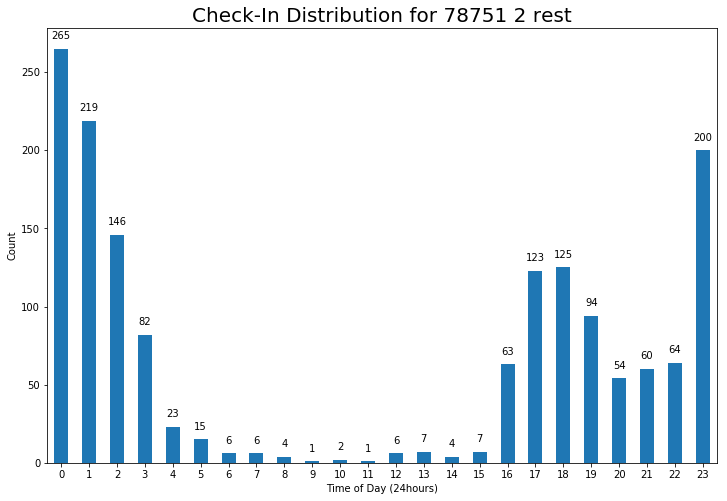

In [59]:
test = df[df['postal_code'] ==78751].head(2)

freq = {}
i=0

while i< len(test): 
    time_list = test.iloc[i].time_split.split(',')
    hours = []
    for t in time_list: 
        hours.append(int(t[0:2]))


    for item in hours:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    print(sorted(freq.items()))

    i+=1
saved = sorted(freq.items())
plt.figure(figsize=(12,8))

x_labels = [val[0] for val in saved]
y_labels = [val[1] for val in saved]
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels,rotation=0)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.title(f'Check-In Distribution for 78751 2 rest',fontsize=20)
plt.ylabel('Count')
plt.xlabel('Time of Day (24hours)')

In [31]:
nc = df[df['name']=="Nervous Charlie's"]

In [32]:
freq = {}
i=0

while i< len(nc): 
    time_list = nc.iloc[i].time_split.split(',')
    hours = []
    for t in time_list: 
        hours.append(int(t[0:2]))
    
    
    for item in hours:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
            
    i+=1
saved = sorted(freq.items())


Text(0.5,0,'Time of Day (24hours)')

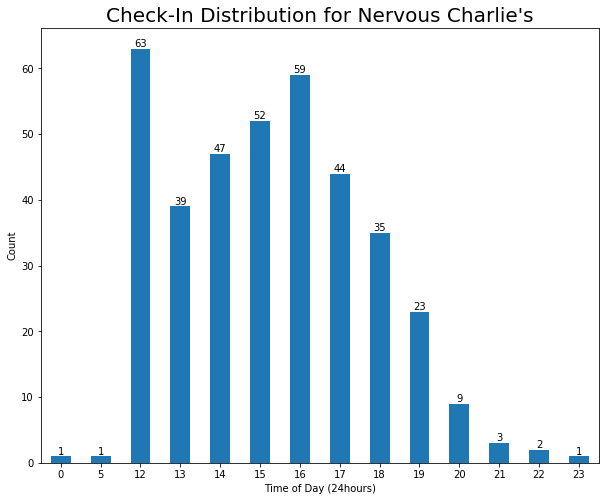

In [33]:
plt.figure(figsize=(10,8))

x_labels = [val[0] for val in saved]
y_labels = [val[1] for val in saved]
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels,rotation=0)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')
    
plt.title("Check-In Distribution for Nervous Charlie's",fontsize=20)
plt.ylabel('Count')
plt.xlabel('Time of Day (24hours)')

In [34]:
single.iloc[0].time_split.split(',')

['02:28:09',
 '03:35:02',
 '18:52:00',
 '05:53:49',
 '02:05:19',
 '01:55:50',
 '00:09:14',
 '23:14:34',
 '21:57:56',
 '01:11:07',
 '17:08:42',
 '02:48:06',
 '17:15:07',
 '23:02:02',
 '23:02:15',
 '02:47:30',
 '16:56:49',
 '18:34:58',
 '00:26:52',
 '00:28:31',
 '17:24:29',
 '01:00:04',
 '00:34:55',
 '00:42:18',
 '18:04:23',
 '21:40:18',
 '21:47:48',
 '21:53:30',
 '21:55:59',
 '01:52:36',
 '01:53:49',
 '16:32:42',
 '01:27:06',
 '00:43:51',
 '20:21:28',
 '19:45:18',
 '03:12:18',
 '22:46:45',
 '20:42:29',
 '20:42:56',
 '18:29:04',
 '23:32:15',
 '17:42:25',
 '19:37:04',
 '20:30:16',
 '01:09:07',
 '20:15:13',
 '01:19:24',
 '01:26:11',
 '01:30:40',
 '00:48:41',
 '00:15:49',
 '22:03:46',
 '20:01:02',
 '00:17:24',
 '00:01:46',
 '01:00:47',
 '01:24:40',
 '19:48:09',
 '18:20:37',
 '01:19:32',
 '22:09:59',
 '19:11:24',
 '00:00:11',
 '19:44:44',
 '02:17:44',
 '02:23:28',
 '22:57:39',
 '02:57:44',
 '17:17:30',
 '14:25:50',
 '00:54:54',
 '16:37:13',
 '00:55:21',
 '23:30:30',
 '01:12:19',
 '17:23:13',

In [35]:
len(hours)

379

In [36]:
sorted(Counter(hours))


[0, 5, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [37]:
Counter(hours).most_common

<bound method Counter.most_common of Counter({12: 63, 16: 59, 15: 52, 14: 47, 17: 44, 13: 39, 18: 35, 19: 23, 20: 9, 21: 3, 22: 2, 0: 1, 5: 1, 23: 1})>

In [38]:
sns.barplot

<function seaborn.categorical.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000002DE2208C510>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)>

In [39]:
#df.loc[0,'day_split']=day

In [40]:
'''
day = ''
i=0

while i <len(temp_date):
    day+=temp_date[i:i+10]
    day+=','

    i+=21
day = day.rstrip(day[-1])


time = ''
i=11

while i <len(temp_date):
    time+=temp_date[i:i+8]
    time+=','

    i+=21
time = time.rstrip(time[-1])
'''

"\nday = ''\ni=0\n\nwhile i <len(temp_date):\n    day+=temp_date[i:i+10]\n    day+=','\n\n    i+=21\nday = day.rstrip(day[-1])\n\n\ntime = ''\ni=11\n\nwhile i <len(temp_date):\n    time+=temp_date[i:i+8]\n    time+=','\n\n    i+=21\ntime = time.rstrip(time[-1])\n"

In [41]:
#temp_date[21:31]

In [42]:
#day

In [43]:
#temp_date[32:40]

In [44]:
#temp_date

In [45]:
#time

Text(0.5,0,'Time of Day (24hours)')

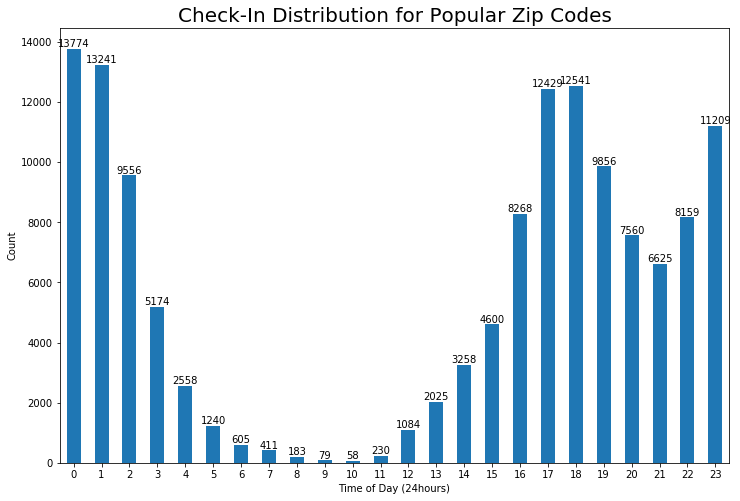

In [65]:
north = df[df['postal_code'].isin([78704])]
    
freq = {}
i=0

while i< len(north): 
    time_list = north.iloc[i].time_split.split(',')
    hours = []
    for t in time_list: 
        hours.append(int(t[0:2]))


    for item in hours:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    hours.clear()
    time_list.clear()

    i+=1
saved = sorted(freq.items())
plt.figure(figsize=(12,8))

x_labels = [val[0] for val in saved]
y_labels = [val[1] for val in saved]
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels,rotation=0)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.title(f'Check-In Distribution for {names[total_zips.index(z)]} Zip Codes',fontsize=20)
plt.ylabel('Count')
plt.xlabel('Time of Day (24hours)')